## Model Building and Evaluation

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('synthetic_hr_data.csv')

### Data Preprocessing

In [ ]:
# Data Preprocessing
imputer = SimpleImputer(strategy='median')
numerical_cols_to_impute = ['PerformanceRating', 'EngagementScore', 'JobSatisfactionScore', 'WorkLifeBalance']
df[numerical_cols_to_impute] = imputer.fit_transform(df[numerical_cols_to_impute])

df['SalaryPerTenure'] = df['SalaryUSD'] / (df['TenureMonths'] + 1)
df = df.drop('EmployeeID', axis=1)
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

X = df.drop('Attrition', axis=1)
y = df['Attrition']
le = LabelEncoder()
y = le.fit_transform(y)

nominal_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=nominal_cols, drop_first=True)
scaler = StandardScaler()
numerical_features = X_encoded.select_dtypes(include=np.number).columns
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

### Model Building

Training Logistic Regression Model
Training Random Forest Classifier Model

Evaluation for Logistic Regression
Classification Report:
              precision    recall  f1-score   support

        Stay       0.79      0.98      0.87       388
       Leave       0.56      0.08      0.14       112

    accuracy                           0.78       500
   macro avg       0.67      0.53      0.51       500
weighted avg       0.74      0.78      0.71       500



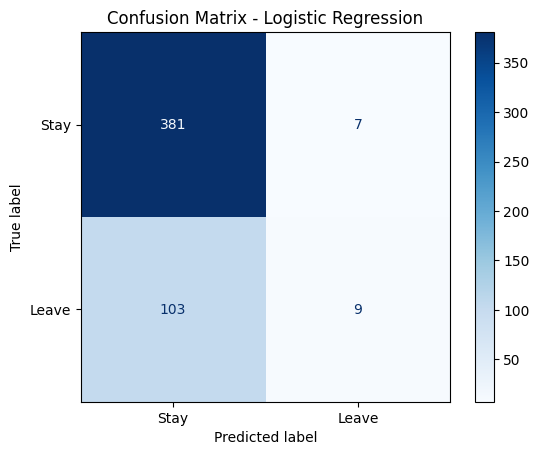


Evaluation for Random Forest Classifier
Classification Report:
              precision    recall  f1-score   support

        Stay       0.80      0.97      0.87       388
       Leave       0.55      0.14      0.23       112

    accuracy                           0.78       500
   macro avg       0.67      0.55      0.55       500
weighted avg       0.74      0.78      0.73       500



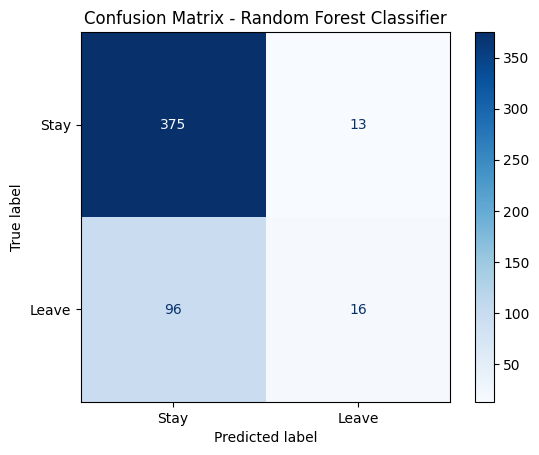


Feature Importance from Random Forest
                    feature  importance
13          SalaryPerTenure    0.109355
12    CultureAlignmentScore    0.100033
1              TenureMonths    0.094318
4                 SalaryUSD    0.089968
9          DistanceFromHome    0.075868
0                       Age    0.070747
3           EngagementScore    0.055488
11     JobSatisfactionScore    0.049337
6   YearsSinceLastPromotion    0.038786
2         PerformanceRating    0.038240


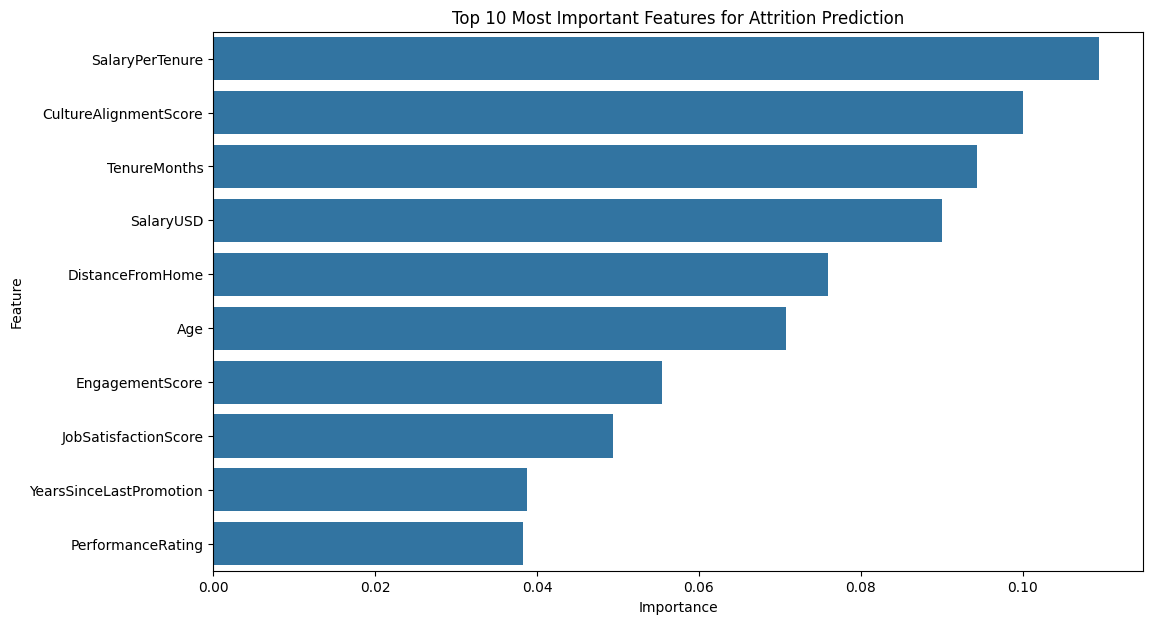

In [10]:
# Model Building
# 1. Logistic Regression Model
print("Training Logistic Regression Model")
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# 2. Random Forest Classifier Model
print("Training Random Forest Classifier Model")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Model Evaluation
# Evaluation for Logistic Regression
print("\nEvaluation for Logistic Regression")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Stay', 'Leave']))

# Plotting the Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['Stay', 'Leave'])
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Evaluation for Random Forest
print("\nEvaluation for Random Forest Classifier")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Stay', 'Leave']))

# Plotting the Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Stay', 'Leave'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# Feature Importance for Random Forest
print("\nFeature Importance from Random Forest")
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_clf.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importances.head(10))

# Plotting feature importance
plt.figure(figsize=(12, 7))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Most Important Features for Attrition Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### **Actionable Business Recommendations** 
Based on these findings, we can provide the following specific, data-driven recommendations to the Tabby People Team:

- **Review and Benchmark Compensation:** Conduct a comprehensive analysis of salaries, focusing on employees with a low SalaryPerTenure score. Proactively review compensation for long-tenured employees to ensure it remains competitive and reflects their growth.

- **Strengthen Onboarding & Culture Integration:** Given the high importance of CultureAlignmentScore, the People Team should invest in tools or surveys to measure this score during the onboarding process and throughout an employee's lifecycle. They should also create initiatives to better integrate new hires into the company culture from day one.

- **Targeted Retention Programs:** Use TenureMonths and other predictors to create targeted retention programs. For example, a "3-Year Tenure Check-in" to discuss career growth or a "6-Month Onboarding Pulse Survey" to identify potential issues early on.

- **Prioritize Flexible Work Policies:** The importance of DistanceFromHome strongly suggests that flexible or remote work options are a critical retention tool. The company should continue to emphasize and promote these policies.

- **Develop a Performance-to-Promotion Framework:** The relatively low importance of YearsSinceLastPromotion compared to other factors might mean that the data is not capturing this relationship well, but it could also mean that promotions aren't happening often enough to be a significant motivator or demotivator. The team should build a clear framework for how performance reviews translate into career progression to ensure employees feel they have a path forward.